In [81]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')


import numpy as np 
from S4Mock_io import read_mainsurvey_targets, read_mainsurvey_ledgers
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from desitarget.targets import desi_mask, bgs_mask, mws_mask 

from mock_ledger import load_mxxl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
targets = read_mainsurvey_targets([2,3,12])

is_bright = (targets["BGS_TARGET"].data & bgs_mask["BGS_BRIGHT"]) != 0
is_faint = (targets["BGS_TARGET"].data & bgs_mask["BGS_FAINT"]) != 0

bright = targets[is_bright]
faint = targets[is_faint]
faint

Runtime of 0.207530 seconds after 0 pixels


RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,HPXPIXEL
int16,int32,str8,int32,str4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,int8,float32,float32,float32,float32,float32,float32,str1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
9010,357870,0392p047,5277,EXP,39.27907437505152,902440800000.0,4.869076942681233,782475130000.0,56396.26 .. 76867.734,0.052438144,2.9824378,9.223935,20.016348,959.3051,431.27417,79.109886,0.8562203,0.90071744,0.9431895,0.026285933,0.02326471,0.013955729,0.002954484,0.0037149268,0.00466132,0.9993777,0.9991935,0.8741062,6,6,7,3033.2422,1726.4554,258.25317,1804.9409,926.21375,139.09508,39.08292,36.432983,524.56256,4183.913,2.2127254,0.54509073,0.001028213,1.6338077e-05,0.99115264,0.99455726,0.9988367,0.9995606,0,0,0,1.1191082,3.4611223,7.510788,1.1298735,3.4927964,7.5439253,0.0,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,1.0102103,0.055769313,0.33603543,37487.88,26695.58,44161.047,1.0,0.0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,S,39627900080624797,1152921504606846976,65537,0,0.2137880741022674,516,2000,2,0,128
9010,357870,0392p047,6448,DEV,39.31929245252999,1397138000000.0,4.8745281168828685,1455514800000.0,93109.336 .. 120897.0,0.053743158,2.9985232,13.68288,33.33831,460.34976,297.94458,54.63796,0.85291904,0.8983766,0.94181764,0.015140003,0.0091163665,0.0051777624,0.17359795,0.0439385,0.04149776,0.8467786,0.9415985,0.9553503,7,8,10,2737.0237,2350.4778,353.95697,1619.4541,1263.7319,190.65666,77.5855,35.90855,-445.8525,-6555.8735,1.5676606,0.42782703,0.00084669574,1.5345977e-05,0.9909335,0.9944222,0.9988078,0.9995497,0,0,0,0.83226097,3.7977784,9.25328,0.83231235,3.7985332,9.253901,0.0,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,1.480848,-0.036742102,0.11225945,16481.746,26109.463,61207.35,4.0,0.0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,S,39627900080625968,1152921504606912513,65537,0,0.649211619752651,5

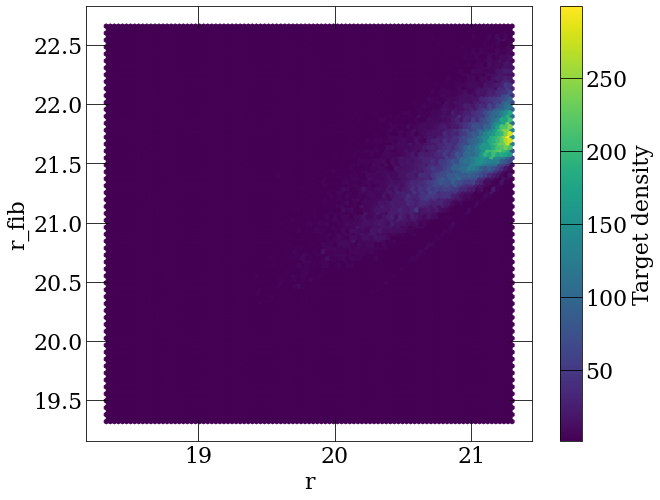

In [89]:
#need r fiber and r 
#have fiberflux_r and flux_r

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


r= 22.5- np.log10(bright['FLUX_R'].data/bright['MW_TRANSMISSION_R'].data)
r_fib = 22.5- np.log10(bright['FIBERFLUX_R'].data/bright['MW_TRANSMISSION_R'].data)


# Calculate the point density


plt.figure(figsize=(10,8))

plt.hexbin(r, r_fib,vmin=1)
cbar = plt.colorbar()
cbar.set_label('Target density')

plt.xlabel('r')
plt.ylabel('r_fib')

plt.show()

<ipython-input-86-68af6d39e2bc>:4: RuntimeWarning: invalid value encountered in log10
  W1 = 22.5- np.log10(faint['FLUX_W1'].data/faint['MW_TRANSMISSION_W1'].data)


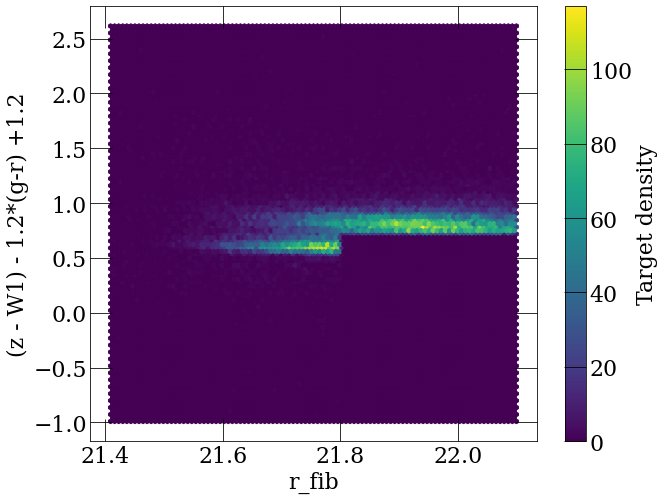

In [86]:
r_fib = 22.5- np.log10(faint['FIBERFLUX_R'].data/faint['MW_TRANSMISSION_R'].data)
g = 22.5- np.log10(faint['FLUX_G'].data/faint['MW_TRANSMISSION_G'].data)
r = 22.5- np.log10(faint['FLUX_R'].data/faint['MW_TRANSMISSION_R'].data)
W1 = 22.5- np.log10(faint['FLUX_W1'].data/faint['MW_TRANSMISSION_W1'].data)
z = 22.5- np.log10(faint['FLUX_Z'].data/faint['MW_TRANSMISSION_Z'].data)
cut =(z - W1) - 1.2*(g-r) +1.2

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)



plt.figure(figsize=(10,8))


plt.hexbin(r_fib, cut)

cbar = plt.colorbar()
cbar.set_label('Target density')

plt.xlabel('r_fib')
plt.ylabel('(z - W1) - 1.2*(g-r) +1.2')

plt.show()

In [78]:
root  = "/global/cfs/cdirs/desi/mocks/bgs/MXXL/one_percent/"
fpath = root + "one_percent_v2.hdf5"
f   = h5py.File(fpath, mode='r')

#if we were loading in the whole mxxl could do this 
mxxl = load_mxxl()
mxxl['NMOCK'] = f['nmock'][:]

ValueError: Inconsistent data column lengths

In [15]:
import h5py

root  = "/global/project/projectdirs/desi/mocks/bgs/MXXL/onepercent/"

fpath = root + "galaxy_catalogue_small.hdf5"

f   = h5py.File(fpath, mode='r')

ra  = f["Data/ra"][...]
dec = f["Data/dec"][...]
z   = f["Data/z_obs"][...]
r   = f["Data/app_mag"][...]

f.close()



In [10]:
f.keys()

<KeysViewHDF5 []>

In [16]:
f   = h5py.File('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent/one_percent_v2.hdf5',mode='r')

In [17]:
f.keys()

<KeysViewHDF5 ['nmock']>

In [20]:
for i in range(36):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
